In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.special import boxcox1p

In [2]:
train=pd.read_csv("/MLProject/train.csv")
test=pd.read_csv("/MLProject/test.csv")

In [3]:
#check the dataset
print(train.shape)
print(test.shape)
print(train.head)
print(test.head)

(1460, 81)
(1459, 80)
<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   


In [4]:
#check the missing value
#Missing Value in train
miss_train = train.isnull().sum().sort_values(ascending=False)
percent_train = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_train = pd.concat([miss_train, percent_train], axis=1, keys=['Missing', 'Percent'])
missing_train.head(20)

,Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
#Missing Value in test
miss_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_test = pd.concat([miss_test, percent_test], axis=1, keys=['Missing', 'Percent'])
missing_test.head(35)

,Missing,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


Skewness: 1.882876
Kurtosis: 6.536282


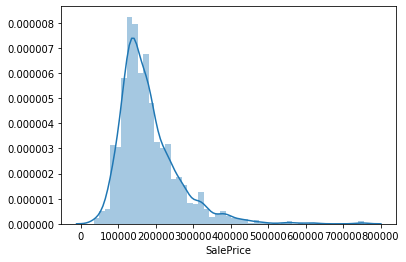

In [6]:
#Now we have a brief view of the missing value, we will deal with it later.And let us focus on our target variable and the relationship between target and other variables.
sns.distplot(train.SalePrice)
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())



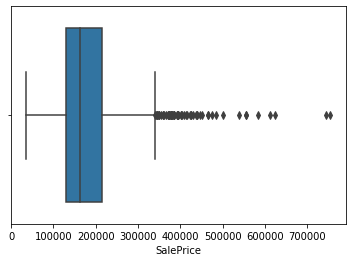

In [7]:
sns.boxplot(train.SalePrice)

In [8]:
#We see the target distribution is not normalized and there are several outliers,we may use the log tranformation to normalize it and delete the outliers
#Now I want to find the relationship between target and other variables
(train.corr())["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

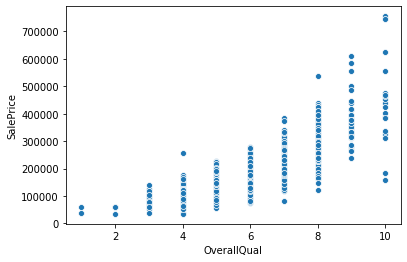

In [9]:
#Now we see the correlation between variables and target in desceiding order, then we put them in scatter plots.
sns.scatterplot(train.OverallQual,train.SalePrice)

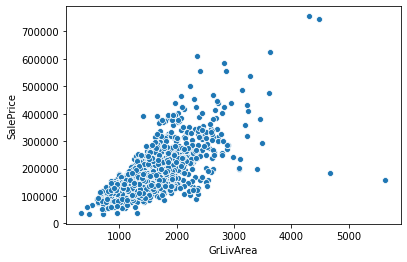

In [10]:
#We see that OverallQual has a strong correlation with SalePrice, now let's see other variables.
sns.scatterplot(train.GrLivArea,train.SalePrice)

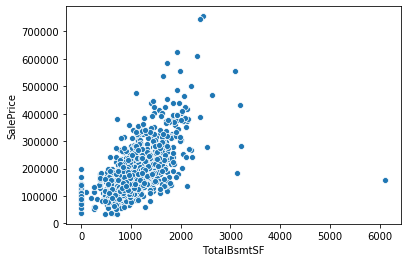

In [11]:
sns.scatterplot(train.TotalBsmtSF,train.SalePrice)

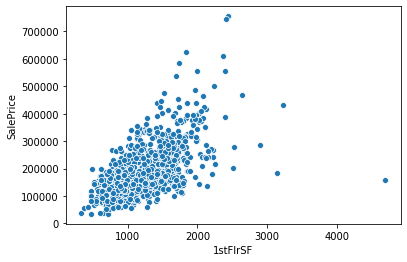

In [12]:
sns.scatterplot(train['1stFlrSF'],train.SalePrice)

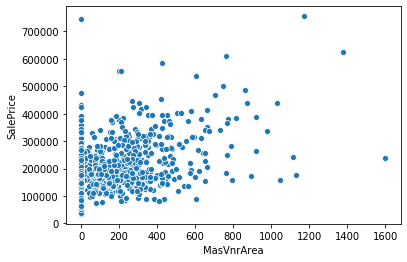

In [13]:
sns.scatterplot(train.MasVnrArea,train.SalePrice)

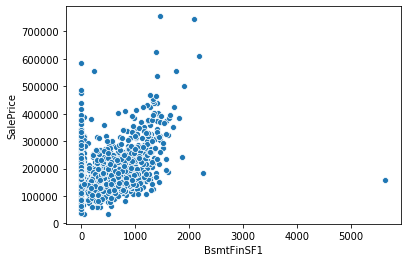

In [14]:
sns.scatterplot(train.BsmtFinSF1,train.SalePrice)

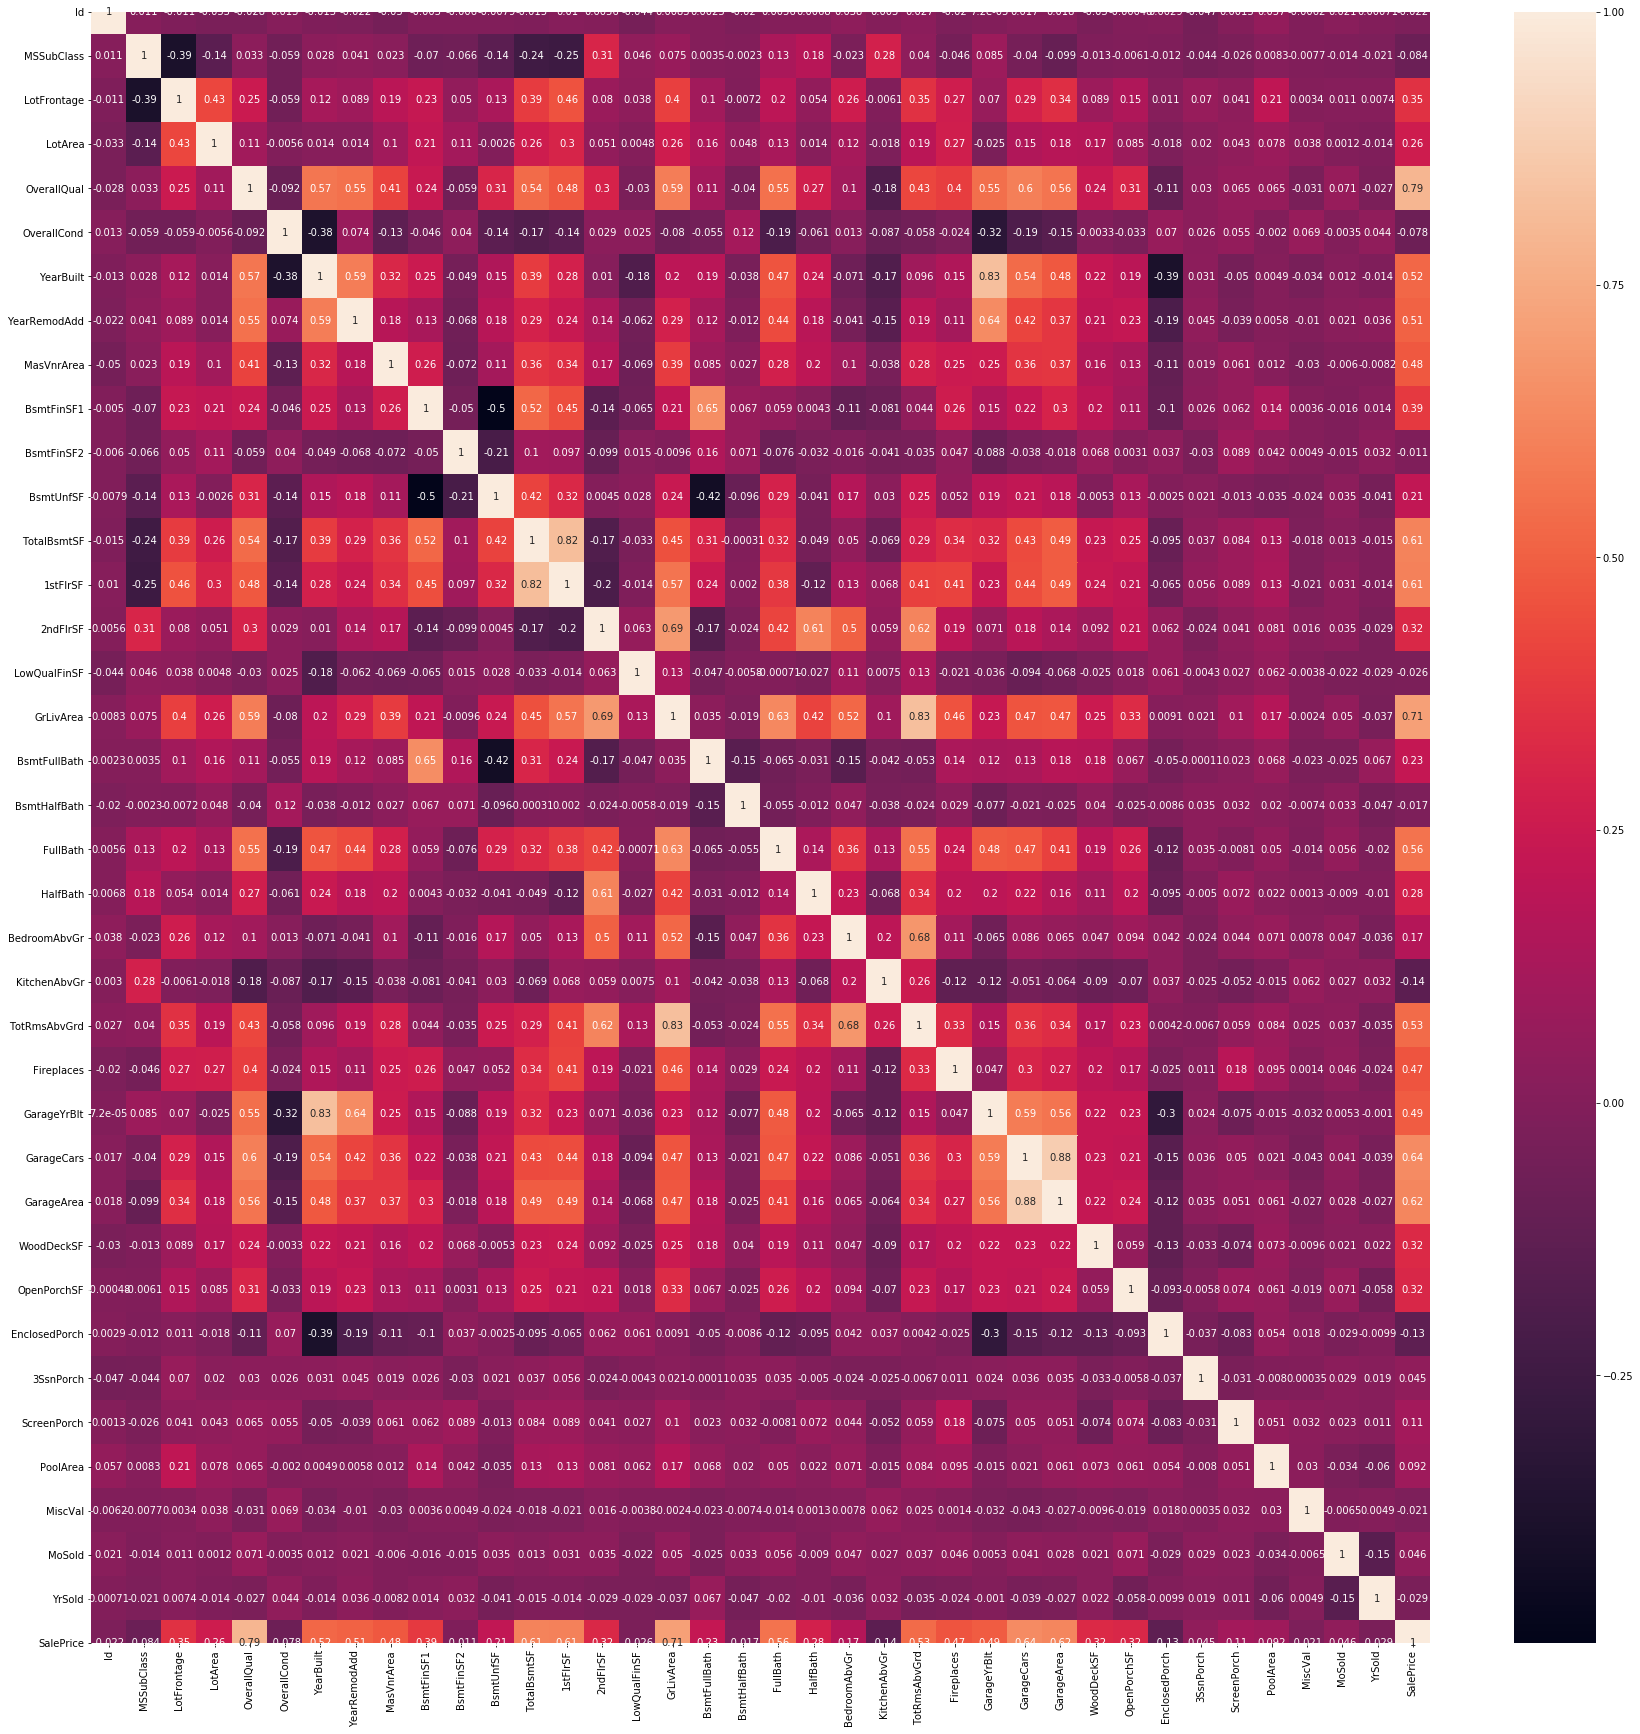

In [15]:
#We have found the correlation between some variables and target, now let's find the correlation between independent variables
#Use the heatmap to find that correlation.
plt.subplots(figsize = (30,30))
sns.heatmap(train.corr(), annot=True)

In [16]:
#we find that there are strong correlation between some features:
#1stFirSF and TotalBsmtSF have a 82% correlation
#TotRmsAbvGrd and  GrLivArea have a 83% correlation
#GarageYrBlt and YearBuilt have a 83% correlation
#GarageCars and GarageArea have a 88% correlation

In [17]:
#Now we focus on the distribution of independent variables
numeric_features = train.dtypes[train.dtypes != "object"].index

skewed_features = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_features)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
LotFrontage            NaN
MasVnrArea             NaN
G

In [18]:
#some features are skewed, we also need to fix it later.

In [19]:
#Until now, we have a brief overview about our dataset:
#There are numerical and categorical features in our dataset
#There are missing values in different features, we need to impute the missing value
#The target value is not normally distributed, which we need to fix later
#There are outliers that need to be removed
#There are strong correlation between some features, we need to delete some of these features.
#Some of our features are skewed, we need the box-cox transformation to fix it


In [20]:
#Feature Engineering
#First,For the outliers in 'GrLivArea', we just remove them.
train = train[train['GrLivArea']<4000]

In [21]:
#deal with the missing value.
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)
y = train['SalePrice'].reset_index(drop=True)

In [22]:
train_drop=train.drop(columns=['SalePrice'],axis=1, inplace=False)

In [23]:
total = pd.concat((train_drop, test)).reset_index(drop = True)

In [24]:
#For Categorical variables
for features in ('Alley','Utilities','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                 'PoolQC','Fence','MiscFeature'):
    total[features]=total[features].fillna('None')
for features in ('MSZoning','Exterior1st','Exterior2nd','KitchenQual','SaleType','Functional'):
    total[features]=total[features].fillna(total[features].mode()[0])

In [25]:
#For numerical variables
for features in ('LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                 'BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea'):
    total[features]=total[features].fillna(total[features].mean())


In [26]:
print(total.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64


In [27]:
#For highly correlated features, remove the one that less correlated with our target
total.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'], axis=1, inplace=True)

In [28]:
#Now we deal with the skewed features.
for features in ('MiscVal', 'PoolArea', 'LotArea', '3SsnPorch','LowQualFinSF', 
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch',
       'BsmtHalfBath','EnclosedPorch',  'OpenPorchSF', 'BsmtFinSF1', 'WoodDeckSF',
       'TotalBsmtSF', 'MSSubClass', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF',
       'OverallCond', 'HalfBath', 'Fireplaces', 'BsmtFullBath'
       ):
     total[features]=boxcox1p(total[features],0.1)

In [29]:
#Make a log transformation with Target
y=np.log(y)

In [30]:
#Get dummy variables
total=pd.get_dummies(total)

In [31]:
#Now we could get our final dataset
len_train=train.shape[0]
len_train
train=total[:len_train]
test=total[len_train:]

In [32]:
#Model
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
model1=Lasso(alpha =0.001, random_state=1)
model2=RandomForestRegressor()
model3=ElasticNet()
model1.fit(train,y)
model2.fit(train,y)
model3.fit(train,y)

E:\CONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
#Predict
ID=pd.read_csv("/MLProject/test.csv")
pred1=model1.predict(test)
pred1=np.exp(pred1)
result1=pd.DataFrame({'Id':ID.Id, 'SalePrice':pred1})

In [34]:
pred2=model2.predict(test)
pred2=np.exp(pred2)
result2=pd.DataFrame({'Id':ID.Id, 'SalePrice':pred2})

In [35]:
pred3=model3.predict(test)
pred3=np.exp(pred3)
result3=pd.DataFrame({'Id':ID.Id, 'SalePrice':pred3})

In [36]:
result1.to_csv('output1.csv',index=False)
result2.to_csv('output2.csv',index=False)
result3.to_csv('output3.csv',index=False)

In [46]:
pred4=0.9*pred1+0.1*pred2
result4=pd.DataFrame({'Id':ID.Id, 'SalePrice':pred4})
result4.to_csv('output4.csv',index=False)

In [47]:
print(result4)

        Id      SalePrice
0     1461  119005.828964
1     1462  151358.619142
2     1463  181790.409033
3     1464  197196.880752
4     1465  194030.760830
...    ...            ...
1454  2915   88507.599340
1455  2916   86532.208366
1456  2917  169011.555480
1457  2918  121358.935636
1458  2919  231040.148835

[1459 rows x 2 columns]
